In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df1 = pd.read_csv('BIKE DETAILS.csv')

In [4]:
df1.isna().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [5]:
# There are 435 null values in the dataset df1

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.1+ KB


In [7]:
df1.describe()

,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [8]:
df1.seller_type.unique()

array(['Individual', 'Dealer'], dtype=object)

In [9]:
df1.owner.unique()

array(['1st owner', '2nd owner', '3rd owner', '4th owner'], dtype=object)

In [10]:
df1.replace("NaN", "0.00" , inplace = True)

In [11]:
df1

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [12]:
##Q1 >>> What is the range of selling prices in the dataset ??

In [13]:
df1.selling_price.max() , df1.selling_price.min()

(760000, 5000)

In [14]:
# So the range of selling price of dataset is Rs 500 to Rs 7.6 lakh

In [15]:
##2 . What is the median selling price for bikes in the dataset

In [16]:
median = np.median(df1.selling_price)

In [17]:
median

45000.0

In [18]:
# so the median of selling price is 45 Thousand

In [19]:
#3 What is the most common seller type

In [20]:
df1.seller_type.value_counts()

,count
seller_type,
Individual,1055
Dealer,6


In [21]:
# The most common seller type is Individual

In [22]:
##4.How many bikes have driven more than 50,000 kilometers

In [23]:
np.count_nonzero(df1.km_driven > 50000)

170

In [24]:
# Total of 170 bikes are travelled more than 50 thousand kilometers

In [25]:
##5 . What is the average km_driven value for each ownership type

In [26]:
df1.groupby('owner').km_driven.mean()

,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


In [27]:
# Hence the average km driven by each owner are  >>>> 1st owner	32816.583333
##   2nd owner	39288.991870
##  3rd owner	33292.181818
##  4th owner	311500.000000


In [28]:
##6  What proportion of bikes are from the year 2015 or older

In [29]:
np.count_nonzero(df1.year < 2015)

501

In [30]:
len(df1.year)

1061

In [31]:
proportion = np.count_nonzero(df1.year < 2015) / len(df1.year)

In [32]:
proportion

0.472196041470311

In [33]:
##7  What is the trend of missing values across the dataset

In [34]:
missing_values = df1.isnull().sum()

In [35]:
missing_values

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [36]:
missimg_values_percentage = (missing_values / len(df1)) * 100

In [37]:
missimg_values_percentage

,0
name,0.000000
selling_price,0.000000
year,0.000000
seller_type,0.000000
owner,0.000000
km_driven,0.000000
ex_showroom_price,40.999057


In [38]:
# Missing values only belong from ex_showroom_price

In [39]:
df1.fillna(0, inplace = True)

In [40]:
df1

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,0.0
1,Honda Dio,45000,2017,Individual,1st owner,5650,0.0
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,0.0
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [41]:
# We replace the null values with 0 , so null values is ths minimum price of ex _showroom prices

In [42]:
###8 . What is the highest ex_showroom_price recorded, and for which bike

In [43]:
df1.ex_showroom_price.max()

1278000.0

In [44]:
df1.name[df1.ex_showroom_price == df1.ex_showroom_price.max()]

,name
134,Harley-Davidson Street Bob


In [45]:
# So the ex show room price Harley-Davidson Street Bob is highest which is 12 lakh 78 thousand


In [46]:
##() What is the total number of bikes listed by each seller type

In [47]:
df1.seller_type.value_counts()

,count
seller_type,
Individual,1055
Dealer,6


In [48]:
# So 1055 bikes are listed for Indovodual owner while only 6 bikes are lsited with dealer

In [49]:
##What is the relationship between selling_price and km_driven for first-owner bikes

In [50]:
x = df1.km_driven[df1.owner == '1st owner']
y = df1.selling_price[df1.owner == '1st owner']

In [51]:
x

,km_driven
0,350
1,5650
2,12000
3,23000
5,60000
...,...
1055,35000
1056,500000
1057,33000
1059,53000


In [52]:
y

,selling_price
0,175000
1,45000
2,150000
3,65000
5,18000
...,...
1055,18000
1056,17000
1057,16000
1059,12000


<function matplotlib.pyplot.show(close=None, block=None)>

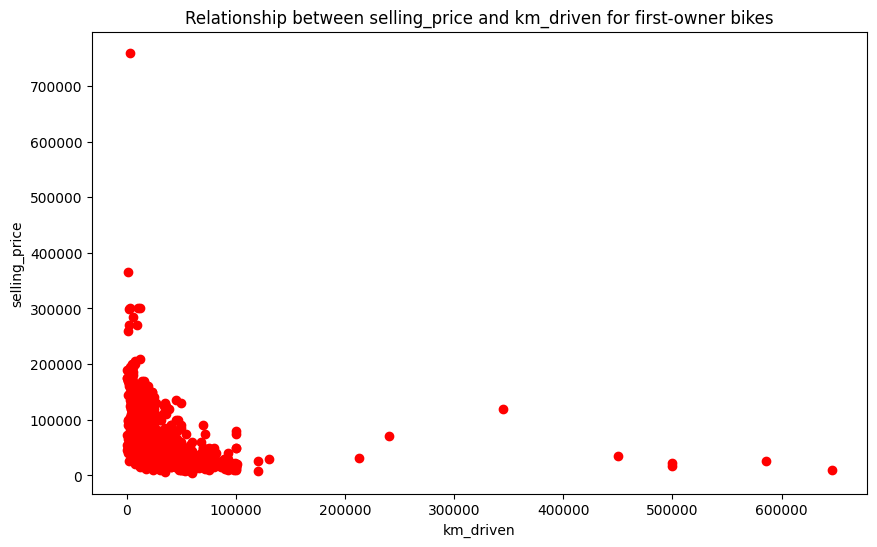

In [53]:
plt.figure(figsize=(10,6))
plt.scatter(x,y , c = 'r')
plt.xlabel('km_driven')
plt.ylabel('selling_price')
plt.title('Relationship between selling_price and km_driven for first-owner bikes')
plt.show

In [54]:
# This shows most of the first ownwe have drivrn their bikes less than 1 lakh km and their selling price ranges to 2 lakh

In [55]:
##11 Identify and remove outliers in the km_driven column using the IQR methodD

In [56]:
q3 = df1.km_driven.quantile(0.75)
q1 = df1.km_driven.quantile(0.25)

In [57]:
IQR = q3 - q1

In [58]:
lf = q1 - 1.5 * IQR
uf = q3 + 1.5 * IQR

In [59]:
outliers = df1[(df1.km_driven < lf) | (df1.km_driven > uf)]

In [60]:
outliers

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
91,Honda Activa [2000-2015],22989,2012,Individual,1st owner,500000,50267.0
93,Suzuki GS150R,30000,2010,Individual,1st owner,130000,70851.0
115,Hero Honda Passion Plus,7500,2004,Individual,1st owner,120000,0.0
135,Hero Honda CBZ extreme,20000,2007,Individual,1st owner,90000,0.0
154,Hero Xtreme Sports,22000,2014,Individual,1st owner,99000,78350.0
184,Honda CB Unicorn 160,75000,2015,Individual,1st owner,100000,79233.0
363,Hero Honda CD100SS,10000,1997,Individual,1st owner,646000,0.0
470,Honda Activa [2000-2015],23000,2009,Individual,1st owner,95000,50267.0
474,Hero Honda Passion PRO [2012],12000,2012,Individual,1st owner,90000,0.0
477,Honda Activa [2000-2015],25000,2009,Individual,1st owner,585659,50267.0


In [61]:
df1 = df1.drop(outliers.index)

In [62]:
df1

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,0.0
1,Honda Dio,45000,2017,Individual,1st owner,5650,0.0
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,0.0
...,...,...,...,...,...,...,...
1054,Hero CBZ Xtreme,20000,2010,Individual,1st owner,50000,78700.0
1055,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0


In [63]:
##12. Perform a bivariate analysis to visualize the relationship between year and selling_priceD

In [64]:
df1.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [65]:
cats = ['name', 'seller_type','owner']

In [66]:
nums = ['year', 'km_driven', 'ex_showroom_price', 'selling_price']

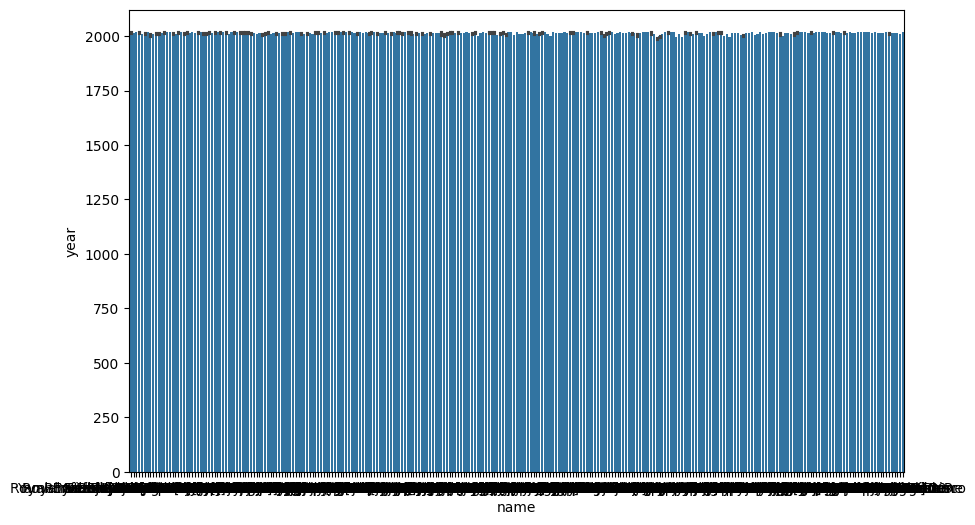

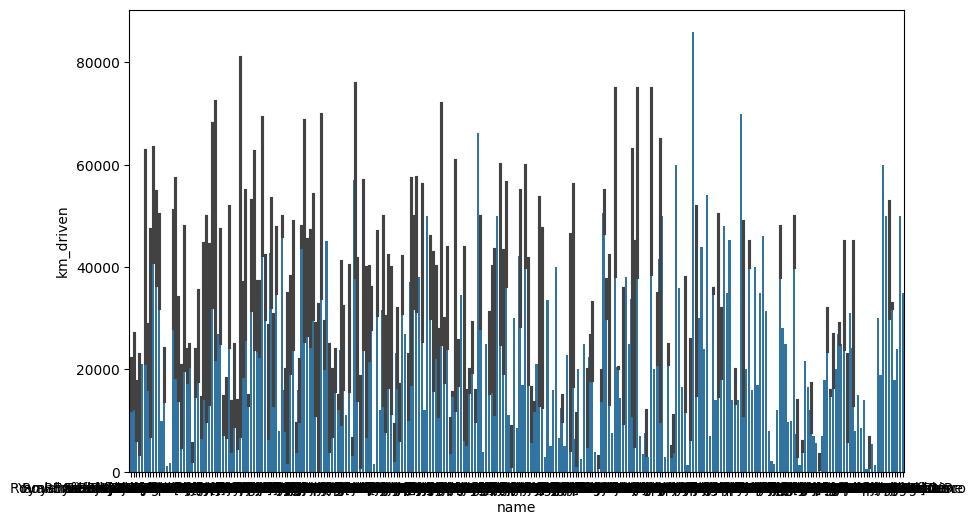

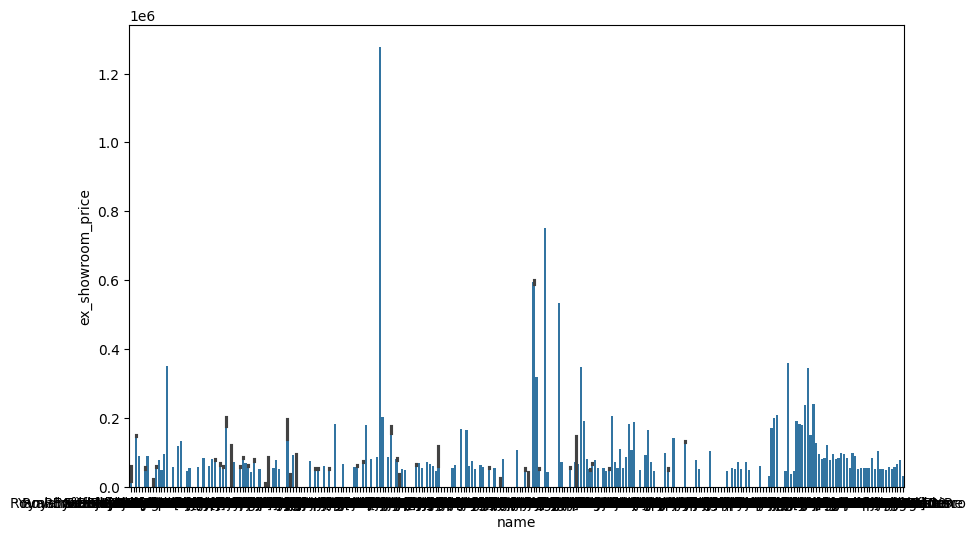

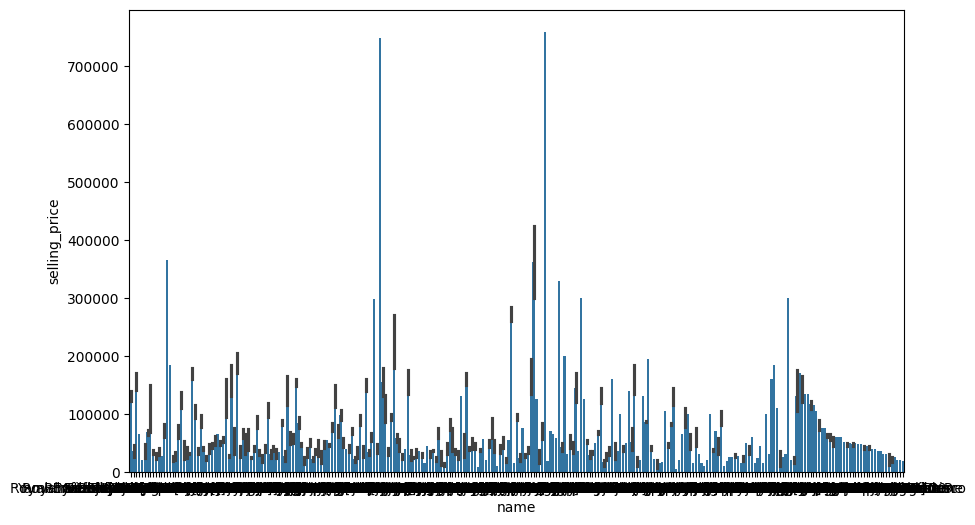

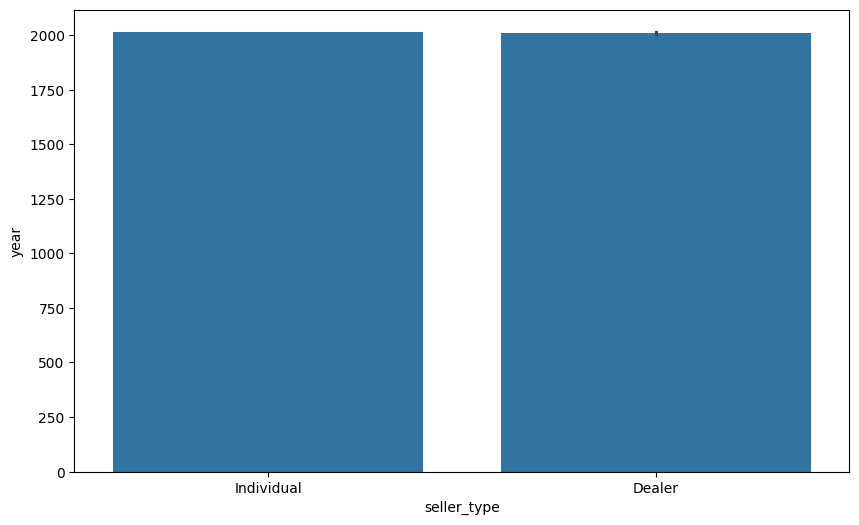

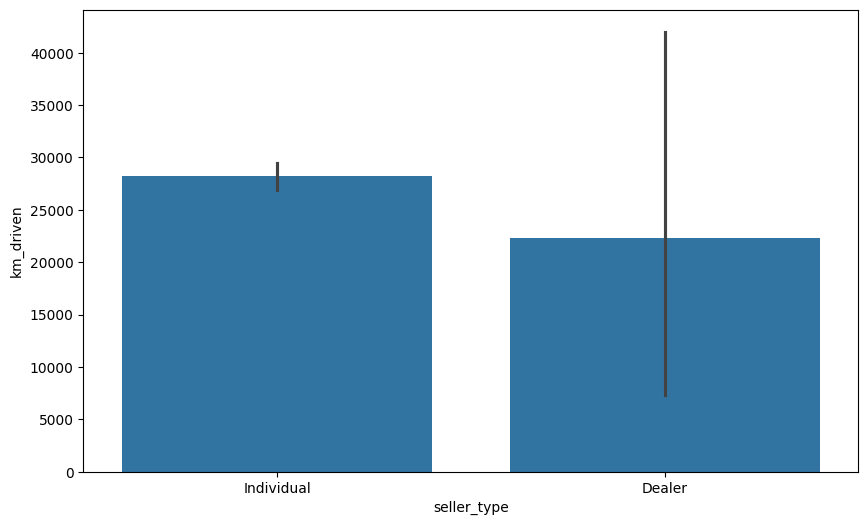

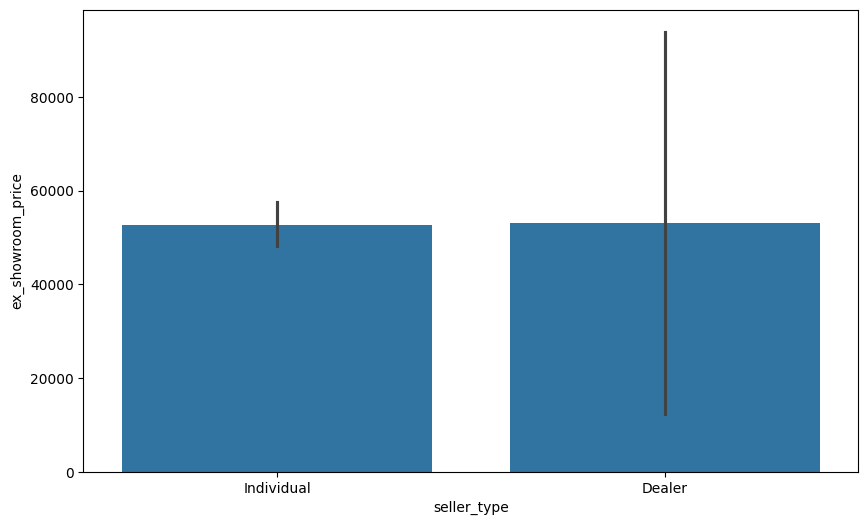

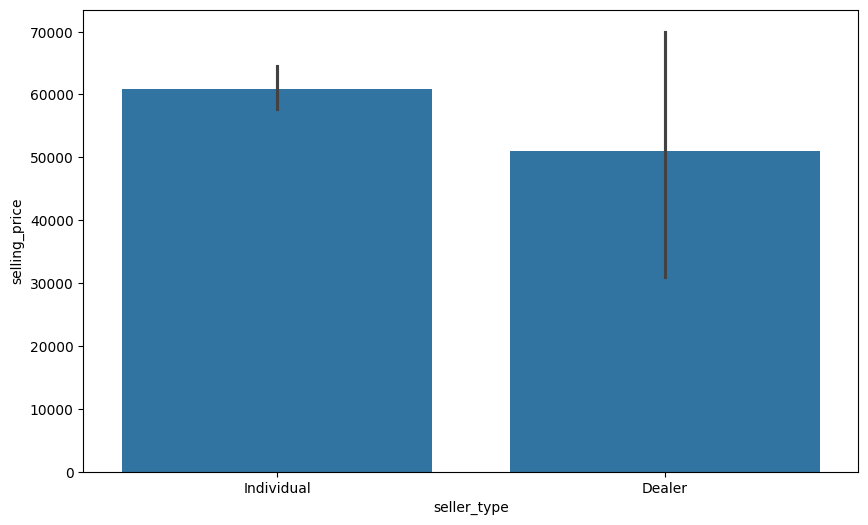

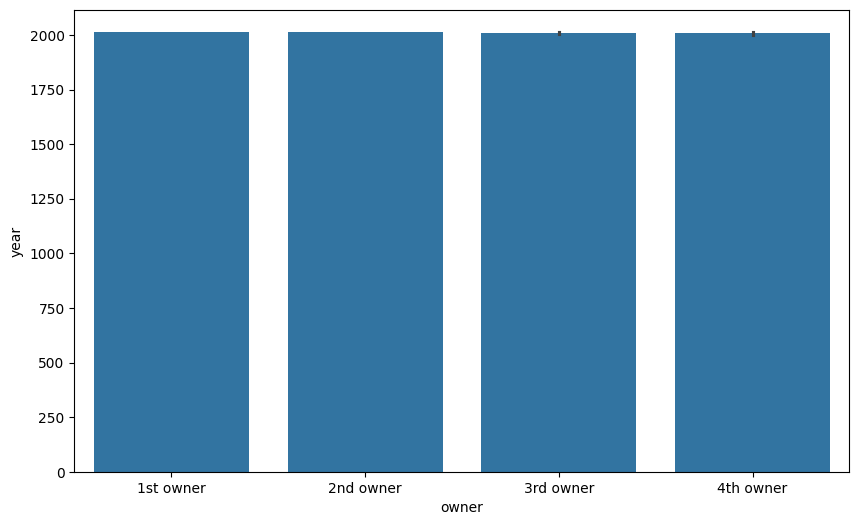

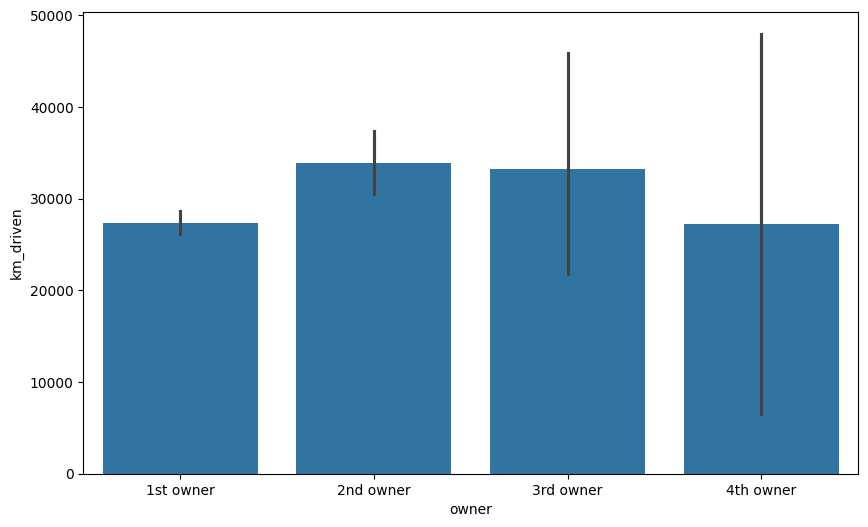

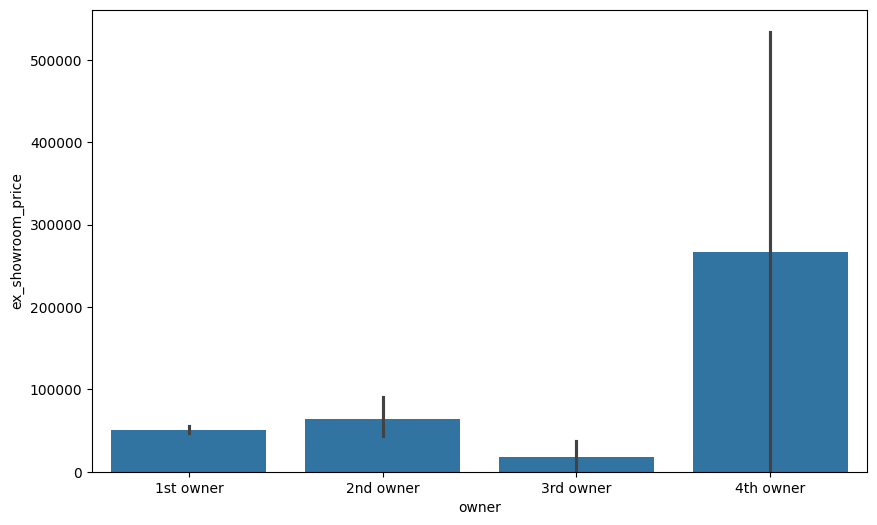

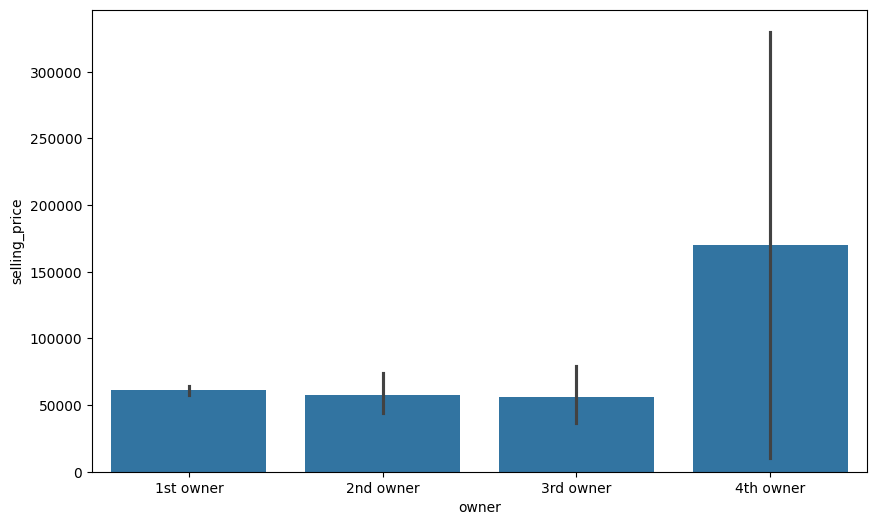

In [67]:
for cat_column in cats:
  for num_column in nums:
    plt.figure(figsize=(10,6))
    sns.barplot(x=cat_column, y=num_column, data=df1)

In [68]:
##13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing
## year)

In [69]:
x = df1.selling_price
y = df1.ex_showroom_price

In [70]:
dep = x - y
dep

,0
0,175000.0
1,45000.0
2,1886.0
3,-24643.0
4,20000.0
...,...
1054,-58700.0
1055,-14000.0
1057,-35000.0
1058,-42000.0


In [71]:
average_depreciation = dep.mean()

In [72]:
average_depreciation

8208.227984344423

In [73]:
##14. Which bike names are priced significantly above the average price for their manufacturing year

In [74]:
x = df1.ex_showroom_price

In [75]:
x_avg = np.mean(x)

In [76]:
x_avg

52601.938356164384

In [77]:
y = df1.name[df1.selling_price > x_avg]

In [78]:
y

,name
0,Royal Enfield Classic 350
2,Royal Enfield Classic Gunmetal Grey
3,Yamaha Fazer FI V 2.0 [2016-2018]
6,Honda CB Hornet 160R
7,Royal Enfield Bullet 350 [2007-2011]
...,...
1003,Yamaha FZ v 2.0
1004,Bajaj Pulsar NS 200
1005,TVS Apache RTR 160
1006,Hero Extreme


In [79]:
##14 Develop a correlation matrix for numeric columns and visualize it using a heatmap.

In [80]:
corr = df1.corr(numeric_only=True)

In [81]:
corr

,selling_price,year,km_driven,ex_showroom_price
selling_price,1.000000,0.389686,-0.403412,0.605363
year,0.389686,1.000000,-0.462554,0.196833
km_driven,-0.403412,-0.462554,1.000000,-0.154626
ex_showroom_price,0.605363,0.196833,-0.154626,1.000000


<Axes: >

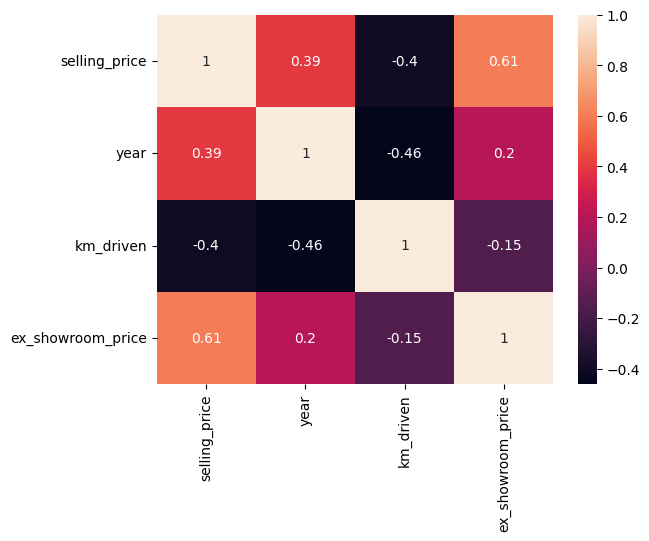

In [82]:
sns.heatmap(corr, annot=True)

In [83]:
## Car sale dataset

In [84]:
df2 = pd.read_csv('Car Sale.csv')

In [85]:
df2.head(5)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [86]:
df2.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [87]:
df2.dtypes
df2["Price ($)"] = df2["Price ($)"].replace('[\$,]', '', regex=True).astype(float)

In [88]:
cats = ["Car_id", "Customer Name", "Gender","Dealer_Name","Company", "Model","Engine", "Transmission", "Color","Dealer_No","Body Style","Dealer_Region"]

In [89]:
nums = ["Annual Income","Price ($)"]

In [90]:
df2.isna().sum()

,0
Car_id,0
Date,0
Customer Name,1
Gender,0
Annual Income,0
Dealer_Name,0
Company,0
Model,0
Engine,0
Transmission,0


In [91]:
# There is only one null value and thats with customer_name

In [92]:
df2.fillna("no_name", inplace = True)

In [93]:
df2.isna().sum()

,0
Car_id,0
Date,0
Customer Name,0
Gender,0
Annual Income,0
Dealer_Name,0
Company,0
Model,0
Engine,0
Transmission,0


In [94]:
# All tghe null value are treated

In [95]:
##1 . What is the average selling price of cars for each dealer, and how does it compare across different dealers

In [96]:
a = df2.groupby('Dealer_Name')['Price ($)'].mean()

In [97]:
a

,Price ($)
Dealer_Name,
Buddy Storbeck's Diesel Service Inc,27217.261563
C & M Motors Inc,28111.755200
Capitol KIA,28189.703822
Chrysler Plymouth,27555.526400
Chrysler of Tri-Cities,28123.091054
Classic Chevy,28602.014446
Clay Johnson Auto Sales,27816.027113
Diehl Motor CO Inc,27993.929487
Enterprise Rent A Car,28312.580800


In [98]:
##2 .Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends

In [99]:
x = df2.groupby('Company')['Price ($)'].std()

In [100]:
highest_variation = x.idxmax()

In [101]:
highest_variation

'Lincoln'

In [102]:
## 3 . What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare

In [103]:
x = df2.groupby('Transmission')['Price ($)'].quantile(0.75)

In [104]:
y = df2.groupby('Transmission')['Price ($)'].quantile(0.25)

In [105]:
iqr = x-y

In [106]:
np.max(iqr)

17000.0

In [107]:
np.min(iqr)

16500.0

In [108]:
# so The range of iqr is (17000 , 16500)

In [109]:
a = df2.Transmission.unique()


In [110]:
a

array(['Auto', 'Manual'], dtype=object)

In [111]:
x1 = df2["Price ($)"]

<Axes: xlabel='Transmission', ylabel='Price ($)'>

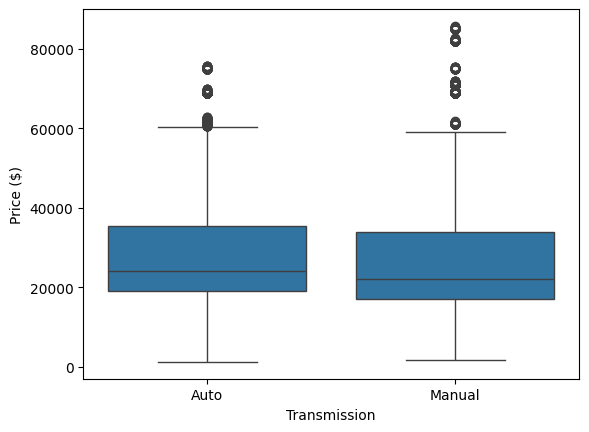

In [112]:
 sns.boxplot(x=df2["Transmission"], y=df2["Price ($)"], data=df2)

<Axes: xlabel='Transmission', ylabel='Price ($)'>

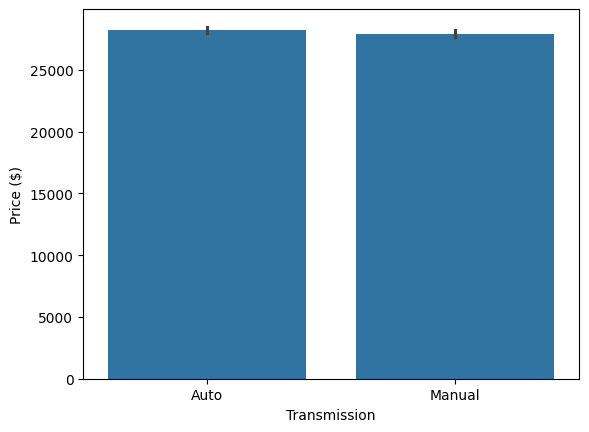

In [113]:
sns.barplot(x=df2["Transmission"], y=df2["Price ($)"], data=df2)

<Axes: xlabel='Price ($)', ylabel='Count'>

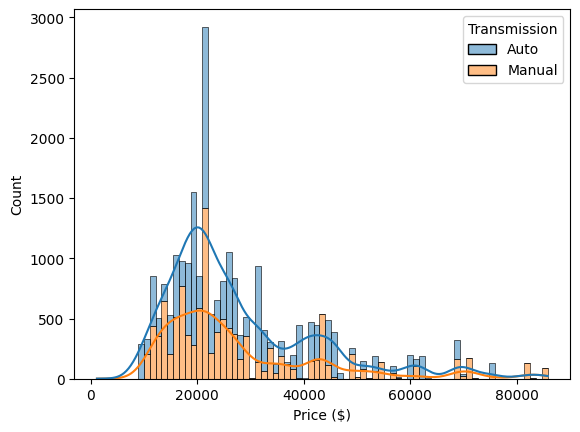

In [114]:
sns.histplot(x=df2["Price ($)"], hue=df2["Transmission"], multiple="stack" , kde = "True")
# Distribution shows that manual cars have slightly high cost as more as more than 80k dollar
# most car ranges in between 20 to 40 k dollar and most car lies between 22 to 24k dollar where most cars are auto trasnmission

In [115]:
##4 . What is the distribution of car prices across different regions

<Axes: xlabel='Dealer_Region', ylabel='Price ($)'>

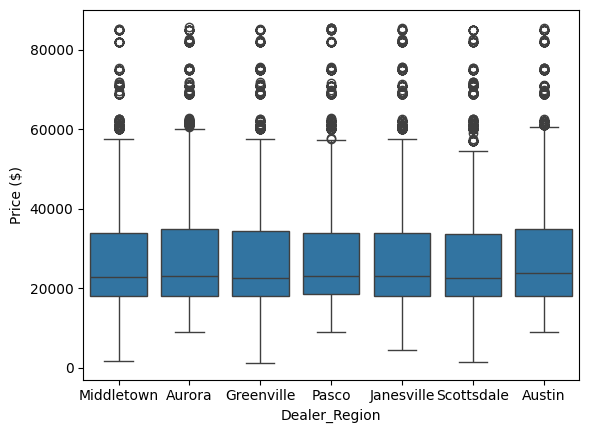

In [116]:
sns.boxplot(x=df2["Dealer_Region"], y=df2["Price ($)"], data=df2)
# This shows the price of cars in Austin is slightly higher as compare to other region

<Axes: xlabel='Price ($)', ylabel='Count'>

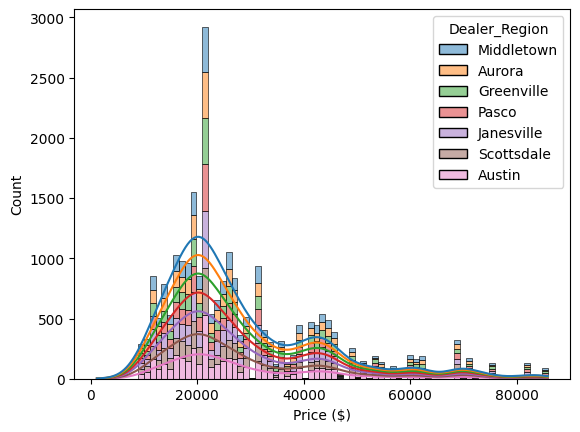

In [117]:
sns.histplot(x=df2["Price ($)"], hue=df2["Dealer_Region"], multiple="stack" , kde = "True")

In [118]:
## 5 .What is the distribution of cars based on body styles


<Axes: xlabel='Body Style', ylabel='count'>

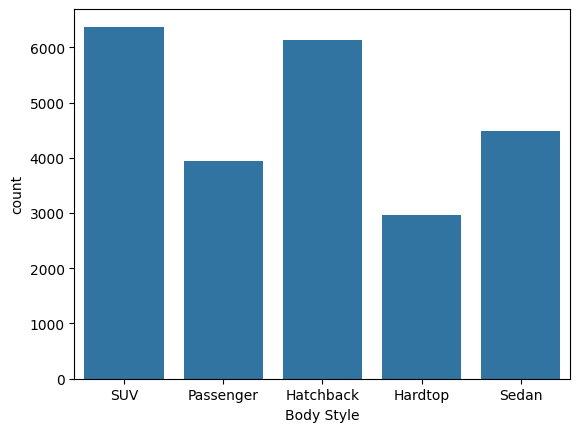

In [119]:
sns.countplot(x=df2["Body Style"])

In [120]:
# highlight  : the suv are mostly in sale in a car sale


In [121]:
## 6 .How does the average selling price of cars vary by customer gender and annual incomeO

In [122]:
a1 = df2.groupby('Gender')['Price ($)'].mean()

In [123]:
a1

,Price ($)
Gender,
Female,28277.265270
Male,28039.429407


In [124]:
# The average selling price of cars is greater in females than males

In [125]:
a2 = df2.groupby('Annual Income')['Price ($)'].mean()

In [126]:
a2

,Price ($)
Annual Income,
10080,22801.000000
13500,27878.981415
24000,61001.000000
85000,43000.000000
106000,46001.000000
...,...
6600000,39000.000000
6800000,15000.000000
7650000,21000.000000


<Axes: xlabel='Price ($)', ylabel='Count'>

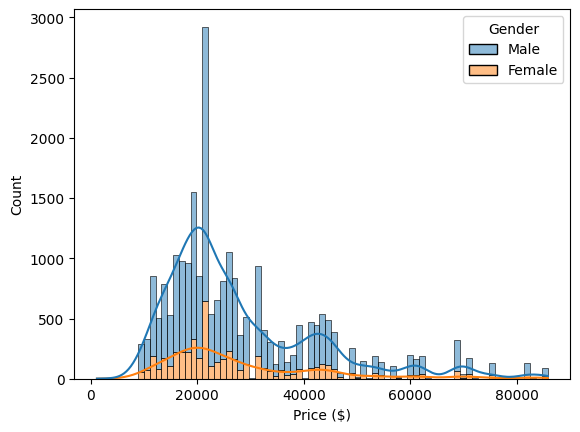

In [127]:
sns.histplot(x=df2["Price ($)"], hue=df2["Gender"], multiple="stack" , kde = "True")

In [128]:
## 7 .What is the distribution of car prices by region, and how does the number of cars sold vary by region

In [129]:
x1 = df2.groupby('Dealer_Region')['Price ($)'].mean()

<Axes: xlabel='Dealer_Region', ylabel='Price ($)'>

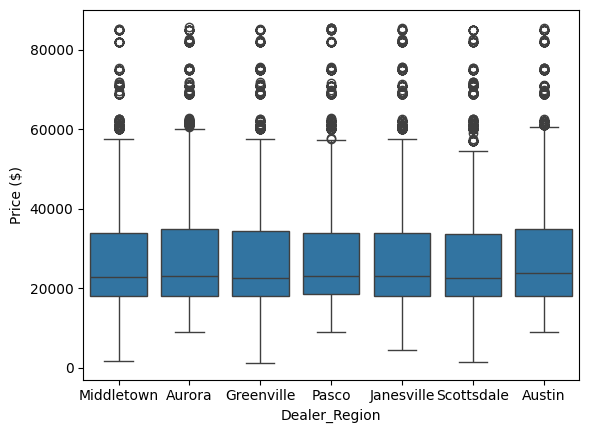

In [130]:
sns.boxplot(x=df2["Dealer_Region"], y=df2["Price ($)"], data=df2)

<Axes: xlabel='Dealer_Region', ylabel='count'>

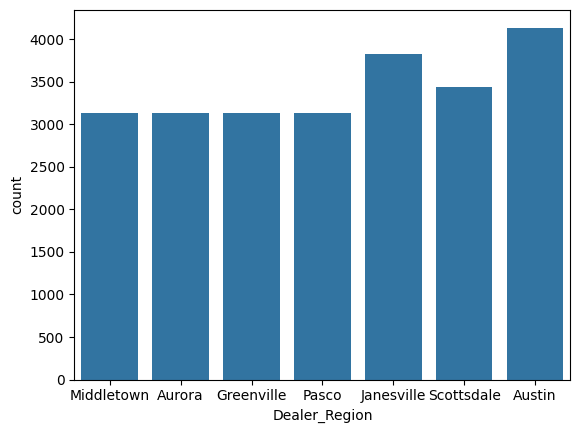

In [131]:
sns.countplot(x=df2["Dealer_Region"])

In [132]:
# HIGHLIGHTS
# Most number of cars are sold in the region "Austin"
# Least number of cars are sold in the region "Pasco"
# Average price of cars are higher in Austin region

In [133]:
##8. How does the average car price differ between cars with different engine sizes

In [134]:
x = df2.groupby('Engine')['Price ($)'].unique()

In [135]:
x

,Price ($)
Engine,
DoubleÂ Overhead Camshaft,"[26000.0, 19000.0, 24500.0, 42000.0, 15000.0, ..."
Overhead Camshaft,"[31500.0, 14000.0, 12000.0, 82000.0, 31000.0, ..."


<Axes: xlabel='Price ($)', ylabel='Count'>

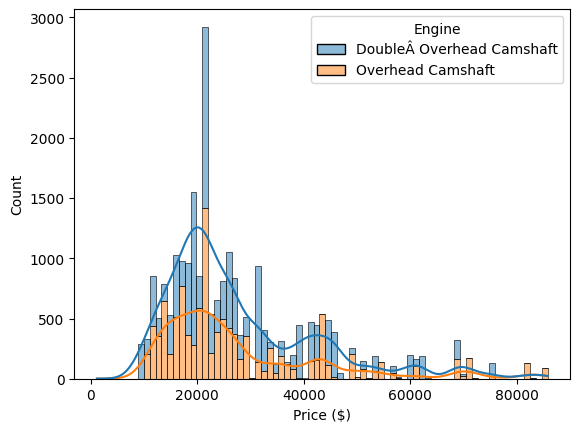

In [136]:
sns.histplot(x=df2["Price ($)"], hue=df2["Engine"], multiple="stack" , kde = "True")

<Axes: xlabel='Engine', ylabel='Price ($)'>

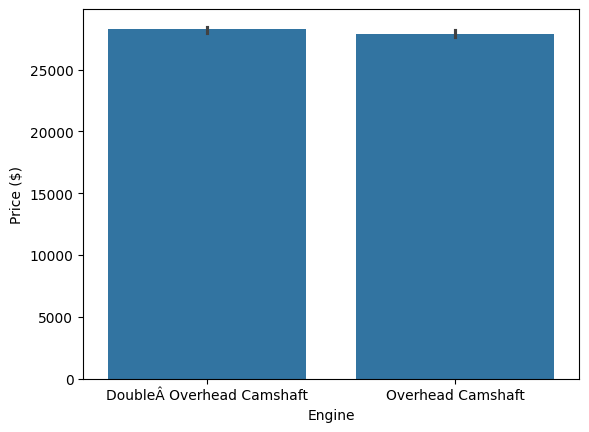

In [137]:
sns.barplot(x=df2["Engine"], y=df2["Price ($)"], data=df2)

In [138]:
y = df2.groupby('Engine')['Price ($)'].mean()

In [139]:
y

,Price ($)
Engine,
DoubleÂ Overhead Camshaft,28248.525972
Overhead Camshaft,27914.710631


In [140]:
# Cars with overhead Camshaft are slightly cheaper then Double Overhead Camshaft mounted engine vehicle
# The most exepensive car have overhead Camshaft engine mounted

In [141]:
##9 .How do car prices vary based on the customer’s annual income bracket

In [142]:
x = df2.groupby('Annual Income')['Price ($)'].mean()

In [143]:
x

,Price ($)
Annual Income,
10080,22801.000000
13500,27878.981415
24000,61001.000000
85000,43000.000000
106000,46001.000000
...,...
6600000,39000.000000
6800000,15000.000000
7650000,21000.000000


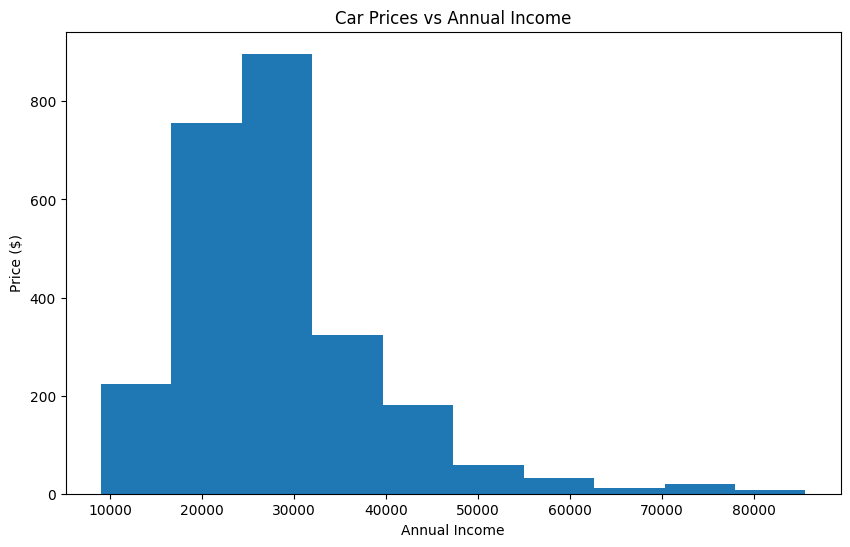

In [144]:
plt.figure(figsize=(10,6))
plt.hist(x)
plt.xlabel('Annual Income')
plt.ylabel('Price ($)')
plt.title('Car Prices vs Annual Income')
plt.show()

In [145]:
##10 . What are the top 5 car models with the highest number of sales, and how does their price distribution look

In [146]:
x = df2['Model'].value_counts()

In [147]:
x

,count
Model,
Diamante,418
Silhouette,411
Prizm,411
Passat,391
Ram Pickup,383
...,...
Mirage,19
Alero,18
RX300,15


In [148]:
x1 = x.nlargest(5)

In [149]:
x1

,count
Model,
Diamante,418
Silhouette,411
Prizm,411
Passat,391
Ram Pickup,383


In [150]:
# Most number of model that is sold is Diamante
a = df2.groupby('Model')['Price ($)'].mean()

In [151]:
x2 = a.nlargest(5)

In [152]:
x2

,Price ($)
Model,
Catera,56836.933333
DeVille,46154.050000
Contour,45309.079646
Integra,44604.000000
Tacoma,44576.743017


In [153]:
# The average price of car model name "Catera " have highest avarage price

In [154]:
###11 .  How does car price vary with engine size across different car colors, and which colors have the highest price variation

In [155]:
x = df2.groupby('Color')['Engine'].value_counts()

In [156]:
x

Color       Engine                   
Black       DoubleÂ Overhead Camshaft    4172
            Overhead Camshaft            3685
Pale White  DoubleÂ Overhead Camshaft    5901
            Overhead Camshaft            5355
Red         DoubleÂ Overhead Camshaft    2498
            Overhead Camshaft            2295
Name: count, dtype: int64

<Axes: xlabel='Color', ylabel='count'>

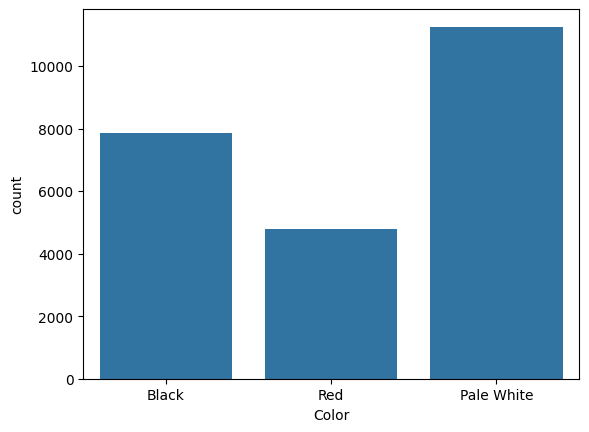

In [157]:
sns.countplot(x=df2["Color"])

In [158]:
# most number of car mainly sold in Pale white colour

<Axes: xlabel='Color', ylabel='Count'>

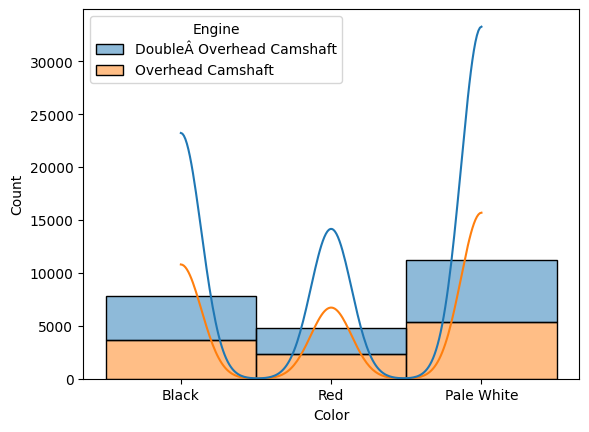

In [159]:
sns.histplot(x=df2["Color"], hue=df2["Engine"], multiple="stack" , kde = "True")

In [160]:
#highlights
# In all three color , people prefer doubleoverhead camshaft over overhead camshaft
# People mostly choose palewhite color


In [161]:
y = df2.groupby('Color')['Price ($)'].std()

In [162]:
y

,Price ($)
Color,
Black,15286.065976
Pale White,14077.346859
Red,15519.360962


In [163]:
# So the largets deviation of price is basically in Red color

In [164]:
### 12. Is there any seasonal trend in car sales based on the date of saleO

In [165]:
x = df2.groupby('Date')['Price ($)'].mean()

In [166]:
x

,Price ($)
Date,
1/10/2022,21100.200000
1/10/2023,27506.733333
1/11/2023,26375.000000
1/12/2022,29146.733333
1/13/2022,27677.500000
...,...
9/6/2023,26495.200000
9/7/2022,28102.342857
9/8/2022,28485.000000


<Axes: xlabel='Date', ylabel='Price ($)'>

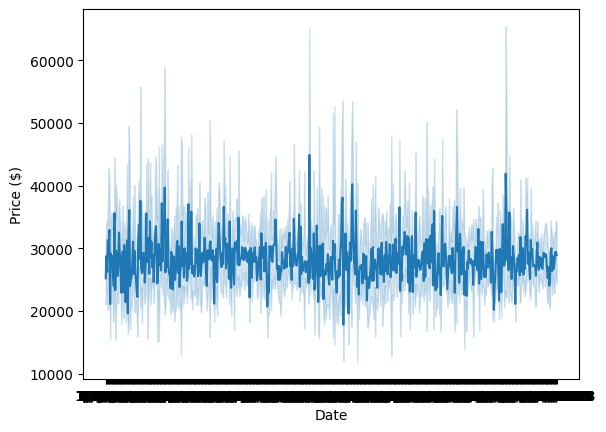

In [167]:
sns.lineplot(x=df2["Date"], y=df2["Price ($)"], data=df2)

In [168]:
max1 =np.max(x)

In [169]:
date = x.idxmax()


In [170]:
date

'12/16/2022'

In [171]:
# Highlight
# The highest number in terms of average price comes at 16 dec 2022

In [172]:
## How does the car price distribution change when considering different combinations of body style and
##transmission type

In [173]:
x = df2.groupby(['Body Style','Transmission'])['Price ($)'].mean()

<Axes: xlabel='Body Style,Transmission'>

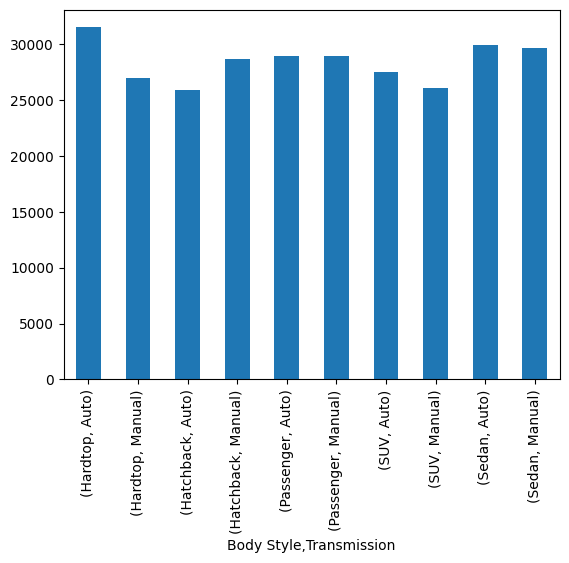

In [174]:
x
x.plot(kind='bar')
# The highest number of vehicle sold is hardtop , auto transmission

<Axes: xlabel='Price ($)', ylabel='Count'>

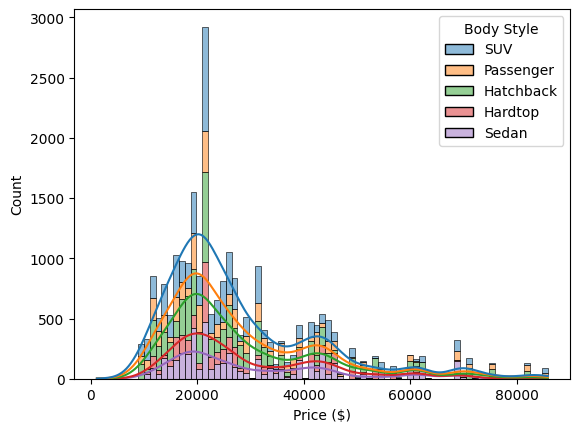

In [175]:
sns.histplot(x=df2["Price ($)"], hue=df2["Body Style"], multiple="stack" , kde = "True")

<Axes: xlabel='Body Style', ylabel='Price ($)'>

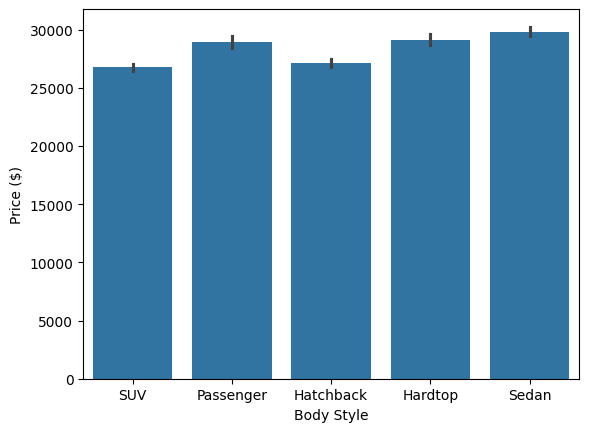

In [176]:
sns.barplot(x=df2["Body Style"], y=df2["Price ($)"], data=df2)

In [177]:
##14. What is the correlation between car price, engine size, and annual income of customers, and how do these
## features interact

In [178]:
x = df2.corr(numeric_only=True)

<Axes: >

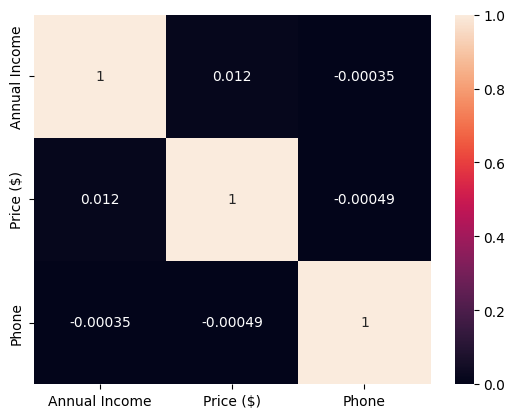

In [179]:
sns.heatmap(x, annot=True)

In [180]:
# The highst correlation is between the price and Annual income

In [181]:
##15 . How does the average car price vary across different car models and engine types?
x = df2.groupby(['Model','Engine'])['Price ($)'].mean()

In [182]:
x

Model     Engine                   
3-Sep     DoubleÂ Overhead Camshaft    37986.380117
3000GT    DoubleÂ Overhead Camshaft    22764.326923
          Overhead Camshaft            21770.659864
300M      DoubleÂ Overhead Camshaft    21394.888889
323i      DoubleÂ Overhead Camshaft    16744.632287
                                           ...     
Windstar  Overhead Camshaft            17100.272727
Wrangler  DoubleÂ Overhead Camshaft    21145.294737
          Overhead Camshaft            18742.942029
Xterra    DoubleÂ Overhead Camshaft    15940.459459
          Overhead Camshaft            31072.500000
Name: Price ($), Length: 261, dtype: float64

<Axes: xlabel='Model,Engine'>

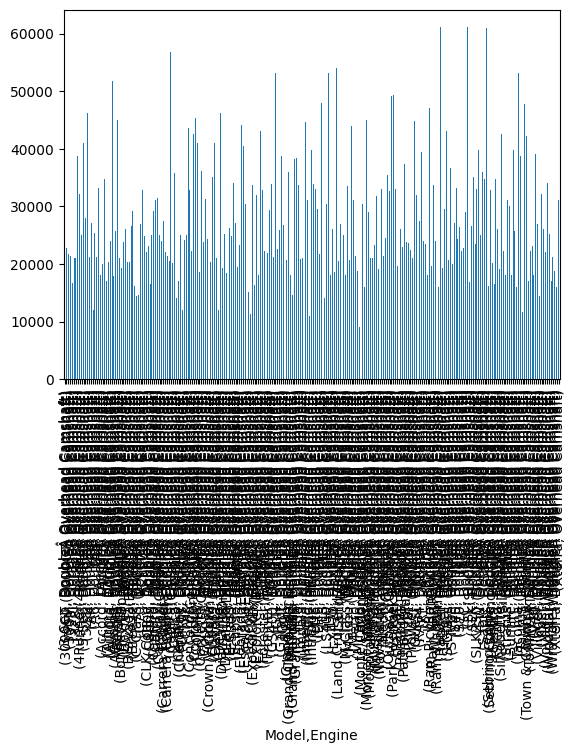

In [183]:
x.plot(kind='bar')

In [184]:
x.nlargest(5)

,,Price ($)
Model,Engine,
SC,Overhead Camshaft,61074.818182
Ranger,DoubleÂ Overhead Camshaft,61064.055556
Sable,Overhead Camshaft,61039.770833
Catera,DoubleÂ Overhead Camshaft,56836.933333
LX470,Overhead Camshaft,54037.490196


In [185]:
# These are the top five model with highest price

In [186]:
## EDA 4 : SPOTIFY SALES

In [187]:
df3 = pd.read_csv('spotify.csv')



In [188]:
df3.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

In [189]:
df3.rename(columns={'Duration (ms)' : 'Duration'}, inplace = True)

In [190]:
df3.to_csv('updated_spotify.csv' , index = False)

In [191]:
df3

,Artist,Track Name,Popularity,Duration,Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


In [192]:
##1 . Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
## the needful

In [193]:
df3.isnull().sum()

,0
Artist,0
Track Name,0
Popularity,0
Duration,0
Track ID,0


In [194]:
# There is no null set in the whole dataframe

In [195]:
df3.duplicated().sum()

27

In [196]:
df3.drop_duplicates(inplace = True)

In [197]:
df3.duplicated().sum()  # Whole duplicated term are dropped

0

In [198]:
##2 .  What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram

<Axes: xlabel='Popularity', ylabel='Count'>

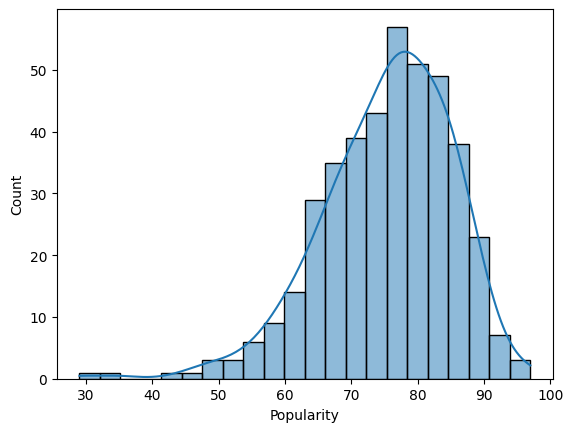

In [199]:
sns.histplot(x=df3["Popularity"], kde = "True")

In [200]:
# Most of the term whose popularity is between 70-90 have more tracks

In [201]:
##3 . Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot

<Axes: xlabel='Popularity', ylabel='Duration'>

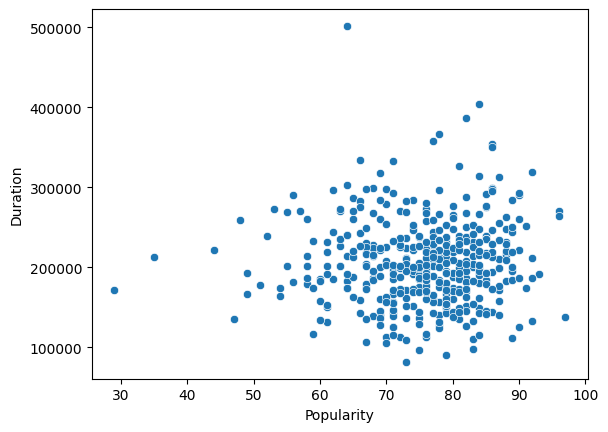

In [202]:
sns.scatterplot(x=df3["Popularity"], y=df3["Duration"])

In [203]:
# most of the tracks are between duration 120 to 300 sec and popularity is between 70-90

In [204]:
##4 . Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot

<Axes: xlabel='Artist', ylabel='count'>

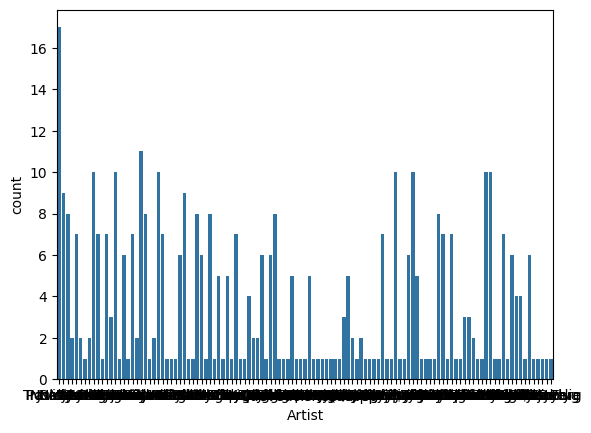

In [205]:
sns.countplot(x=df3["Artist"])

In [206]:
x =df3.Artist.value_counts()
x

,count
Artist,
Drake,17
Eminem,11
Flo Rida,10
Ludacris,10
Timbaland,10
...,...
Arizona Zervas,1
Fivio Foreign,1
Pressa,1


In [207]:
x.nlargest(5)

,count
Artist,
Drake,17
Eminem,11
Flo Rida,10
Ludacris,10
Timbaland,10


In [208]:
# Drake had sung the most number of tracks

In [209]:
##5 .  What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each

In [210]:
x = df3.sort_values('Popularity')

In [211]:
x

,Artist,Track Name,Popularity,Duration,Track ID
207,Pressa,Attachments (feat. Coi Leray),29,171000,6EfJ8Ct3GHbBz2YlyPnMYb
231,Justin Bieber,Intentions,35,212853,7jAVt70Xdg8EwOtsFB1ZqK
413,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
225,Lil Baby,On Me - Remix,47,135444,2uUFVnVFERNxUdcmvEs7LB
407,Wyclef Jean,911 (feat. Mary J. Blige),48,259333,28hgx2bWXcaBJeC9zVwrBq
...,...,...,...,...,...
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
30,Travis Scott,FE!N (feat. Playboi Carti),93,191700,42VsgItocQwOQC3XWZ8JNA
70,21 Savage,redrum,96,270697,52eIcoLUM25zbQupAZYoFh
260,¥$,CARNIVAL,96,264324,3w0w2T288dec0mgeZZqoNN


In [212]:
x.head(5)

,Artist,Track Name,Popularity,Duration,Track ID
207,Pressa,Attachments (feat. Coi Leray),29,171000,6EfJ8Ct3GHbBz2YlyPnMYb
231,Justin Bieber,Intentions,35,212853,7jAVt70Xdg8EwOtsFB1ZqK
413,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
225,Lil Baby,On Me - Remix,47,135444,2uUFVnVFERNxUdcmvEs7LB
407,Wyclef Jean,911 (feat. Mary J. Blige),48,259333,28hgx2bWXcaBJeC9zVwrBq


In [213]:
##6 . Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
## display the average popularity for each artist

In [214]:
x = df3.groupby('Artist')['Popularity'].mean()

In [215]:
x

,Popularity
Artist,
*NSYNC,67.00
2 Chainz,72.00
21 Savage,83.80
A Boogie Wit da Hoodie,80.00
A$AP Ferg,69.00
...,...
Young Nudy,67.00
Young Thug,73.75
benny blanco,72.00


In [216]:
x.nlargest(5)

,Popularity
Artist,
cassö,92.000000
Trueno,89.000000
David Guetta,87.000000
Travis Scott,86.555556
¥$,85.100000


In [217]:
# Casso has the highest populatity on average

In [218]:
##7 . For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist

In [219]:
x = df3.Artist.value_counts()

In [220]:
x

,count
Artist,
Drake,17
Eminem,11
Flo Rida,10
Ludacris,10
Timbaland,10
...,...
Arizona Zervas,1
Fivio Foreign,1
Pressa,1


In [221]:
y = df3.groupby('Artist')['Popularity'].max()

In [222]:
y

,Popularity
Artist,
*NSYNC,67
2 Chainz,72
21 Savage,96
A Boogie Wit da Hoodie,80
A$AP Ferg,69
...,...
Young Nudy,67
Young Thug,76
benny blanco,72


In [223]:
y.nlargest(5)

,Popularity
Artist,
Jack Harlow,97
21 Savage,96
¥$,96
Travis Scott,93
Bizarrap,92


In [224]:
z = df3.groupby('Track Name')['Popularity'].max()

In [225]:
z

,Popularity
Track Name,
20 Min,84
3 Headed Goat (feat. Lil Baby & Polo G),75
3D (feat. Jack Harlow),84
4:44,74
6 Foot 7 Foot,74
...,...
pop ur shit,79
prove it,82
pushin P (feat. Young Thug),75


In [226]:
z.nlargest(5)

,Popularity
Track Name,
Lovin On Me,97
CARNIVAL,96
redrum,96
FE!N (feat. Playboi Carti),93
I KNOW ?,92


In [227]:
# The most popular track is Lovin on me and the most popular artist is Jack Hallow

In [228]:
## 8 . Visualize relationships between multiple numerical variables simultaneously using a pair plot

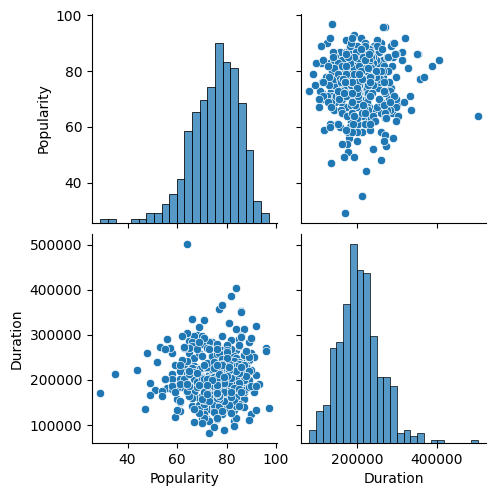

In [229]:
sns.pairplot(df3)

In [230]:
##9 .  Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot

<Axes: xlabel='Artist', ylabel='Duration'>

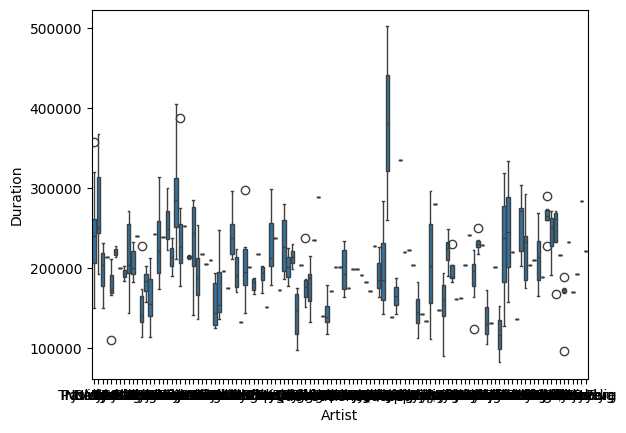

In [231]:
sns.boxplot(x=df3["Artist"], y=df3["Duration"])

<Axes: xlabel='Artist', ylabel='Duration'>

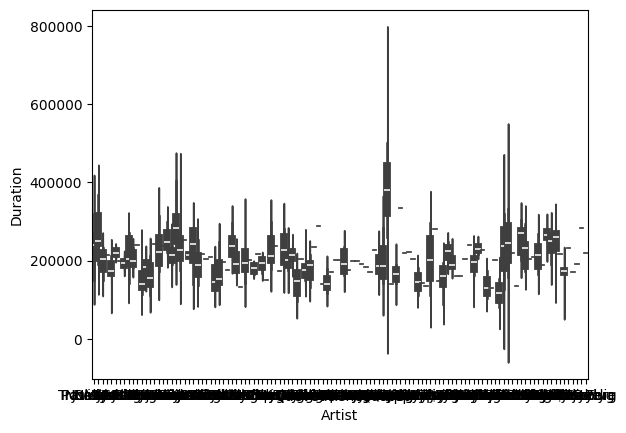

In [232]:
sns.violinplot(x=df3["Artist"], y=df3["Duration"])

In [233]:
##10 .  How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.


<Axes: xlabel='Artist', ylabel='Popularity'>

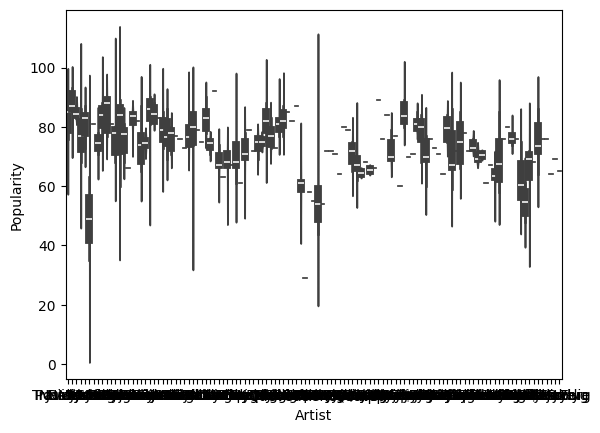

In [234]:
sns.violinplot(x=df3["Artist"], y=df3["Popularity"])

<Axes: xlabel='Artist', ylabel='Popularity'>

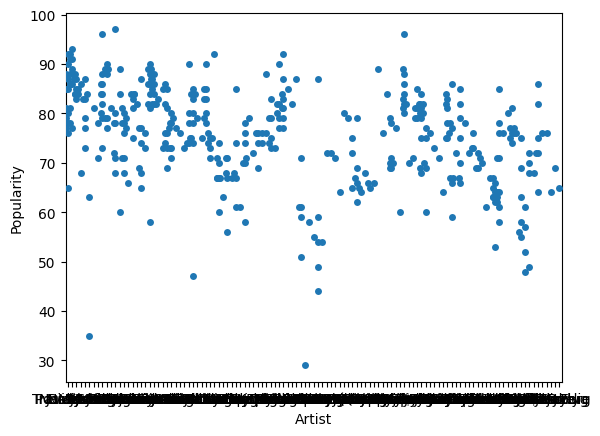

In [235]:
sns.swarmplot(x=df3["Artist"], y=df3["Popularity"])

In [236]:
df4 = pd.read_csv('amazon.csv')

In [237]:
df4.head(5)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [238]:
df4.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [239]:
df4.dtypes

,0
product_id,object
product_name,object
category,object
discounted_price,object
actual_price,object
discount_percentage,object
rating,object
rating_count,object
about_product,object
user_id,object


In [240]:
df4.columns = df4.columns.str.replace(r'[₹]', '', regex=True)

In [241]:
df4

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [242]:
df4 = df4.applymap(lambda x: x.replace('₹', '') if isinstance(x, str) else x)

print("After removing symbol:")
print(df4)  # Remove symbol of ₹ from the values that cointain these values

After removing symbol:
      product_id                                       product_name  \
0     B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1     B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2     B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3     B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4     B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
...          ...                                                ...   
1460  B08L7J3T31  Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...   
1461  B01M6453MB  Prestige Delight PRWO Electric Rice Cooker (1 ...   
1462  B009P2LIL4  Bajaj Majesty RX10 2000 Watts Heat Convector R...   
1463  B00J5DYCCA  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...   
1464  B01486F4G6  Borosil Jumbo 1000-Watt Grill Sandwich Maker (...   

                                               category discounted_price  \
0     Computers&Accessories|Accessories&Peripher

In [243]:
df4

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399,"1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199,349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199,"1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329,699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154,399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,379,919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"2,280","3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",http

In [244]:
df4['discounted_price'] = df4['discounted_price'].str.replace(',', '')


In [245]:
df4['discounted_price'] = df4['discounted_price'].astype(float)

In [246]:
df4['actual_price'] = df4['actual_price'].str.replace(',', '')

In [247]:
df4['actual_price'] = df4['actual_price'].astype(float)

In [248]:
df4['discount_percentage'] = df4['discount_percentage'].str.replace('%', '')

In [249]:
df4['discount_percentage'] = df4['discount_percentage'].astype(float)

In [250]:
df4['rating'] = df4['rating'].str.replace('|', '')

In [251]:
df4['rating'] = df4['rating'].str.replace(',','')

In [252]:
df4['rating_count'] = df4['rating_count'].str.replace(',','')

In [253]:
df4['rating_count'] = df4['rating_count'].astype(float)

In [254]:
df4.dtypes

,0
product_id,object
product_name,object
category,object
discounted_price,float64
actual_price,float64
discount_percentage,float64
rating,object
rating_count,float64
about_product,object
user_id,object


In [255]:
df4.isnull().sum()

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,2
about_product,0
user_id,0


In [256]:
df4.fillna(0, inplace = True)

In [257]:
df4.isnull().sum()

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,0
about_product,0
user_id,0


In [258]:
# all the null set is filled

In [259]:
df4.duplicated().sum()

0

In [260]:
# There are no duplicated dataset

In [261]:
x1 = df4.groupby('product_name')['discounted_price'].mean()

In [262]:
x1.nlargest(5)

,discounted_price
product_name,
Sony Bravia 164 cm (65 inches) 4K Ultra HD Smart LED Google TV KD-65X74K (Black),77990.0
OnePlus 163.8 cm (65 inches) U Series 4K LED Smart Android TV 65U1S (Black),61999.0
VU 164 cm (65 inches) The GloLED Series 4K Smart LED Google TV 65GloLED (Grey),54990.0
LG 139 cm (55 inches) 4K Ultra HD Smart LED TV 55UQ7500PSF (Ceramic Black),47990.0
Samsung 138 cm (55 inches) Crystal 4K Neo Series Ultra HD Smart LED TV UA55AUE65AKXXL (Black),47990.0


In [263]:
# list of top 5 product with discounted price
# Sony Bravia 164 cm (65 inches) 4K Ultra HD Smart LED Google TV KD-65X74K (Black) have largest discounted price

In [264]:
x1.nsmallest(5)

,discounted_price
product_name,
"E-COSMOS 5V 1.2W Portable Flexible USB LED Light (Colours May Vary, Small, EC-POF1)",39.00
GIZGA essentials Universal Silicone Keyboard Protector Skin for 15.6-inches Laptop (5 x 6 x 3 inches),39.00
Inventis 5V 1.2W Portable Flexible USB LED Light Lamp (Colors may vary),39.00
Classmate Octane Neon- Blue Gel Pens(Pack of 5)|Smooth Writing Pen|Attractive body colour for Boys & Girls|Waterproof ink for smudge free writing|Preferred by Students for Exam|Study at home essential,50.00
"FLiX (Beetel Flow USB to Micro USB PVC Data Sync & 12W(2.4A) Fast Charging Cable,Made in India,480Mbps Data Sync,Solid Cable,1 Meter Long cable for all Andriod & Micro USB Devices (Black)(XCD-FPM01)",57.89


In [265]:
# E-COSMOS 5V 1.2W Portable Flexible USB LED Light (Colours May Vary, Small, EC-POF1) is the smallest discounted price

In [266]:
x3 = df4.groupby('product_name')['actual_price'].mean()

In [267]:
x3.nlargest(5)

,actual_price
product_name,
Sony Bravia 164 cm (65 inches) 4K Ultra HD Smart LED Google TV KD-65X74K (Black),139900.0
VU 164 cm (65 inches) The GloLED Series 4K Smart LED Google TV 65GloLED (Grey),85000.0
LG 139 cm (55 inches) 4K Ultra HD Smart LED TV 55UQ7500PSF (Ceramic Black),79990.0
"LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (Copper, Super Convertible 6-in-1 Cooling, HD Filter with Anti-Virus Protection, 2022 Model, PS-Q19YNZE, White)",75990.0
"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM, 128GB Storage) with No Cost EMI & Additional Exchange Offers",74999.0


In [268]:
# Sony Bravia 164 cm (65 inches) 4K Ultra HD Smart LED Google TV KD-65X74K (Black) Have the largest price

In [269]:
x3.nsmallest(5)

,actual_price
product_name,
"E-COSMOS 5V 1.2W Portable Flexible USB LED Light (Colours May Vary, Small, EC-POF1)",39.0
Inventis 5V 1.2W Portable Flexible USB LED Light Lamp (Colors may vary),39.0
Classmate Octane Neon- Blue Gel Pens(Pack of 5)|Smooth Writing Pen|Attractive body colour for Boys & Girls|Waterproof ink for smudge free writing|Preferred by Students for Exam|Study at home essential,50.0
"E-COSMOS 5V 1.2W Portable Flexible USB LED Light (Colors May Vary, Small) - Set of 2 Pieces",59.0
"Classmate Pulse Spiral Notebook - 240 mm x 180 mm, Soft Cover, 200 Pages, Unruled",75.0


In [270]:
##E-COSMOS 5V 1.2W Portable Flexible USB LED Light (Colours May Vary, Small, EC-POF1) havvethe smallest price in term of selling

In [271]:
df4.to_csv('updated_amazon.csv' , index = False)

<Axes: xlabel='discounted_price', ylabel='Count'>

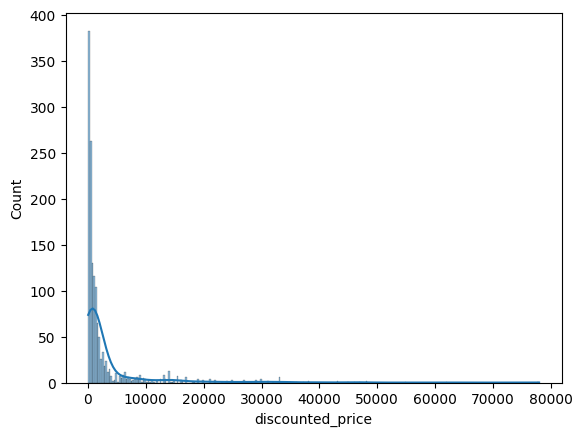

In [272]:
sns.histplot(x=df4["discounted_price"], kde = "True")

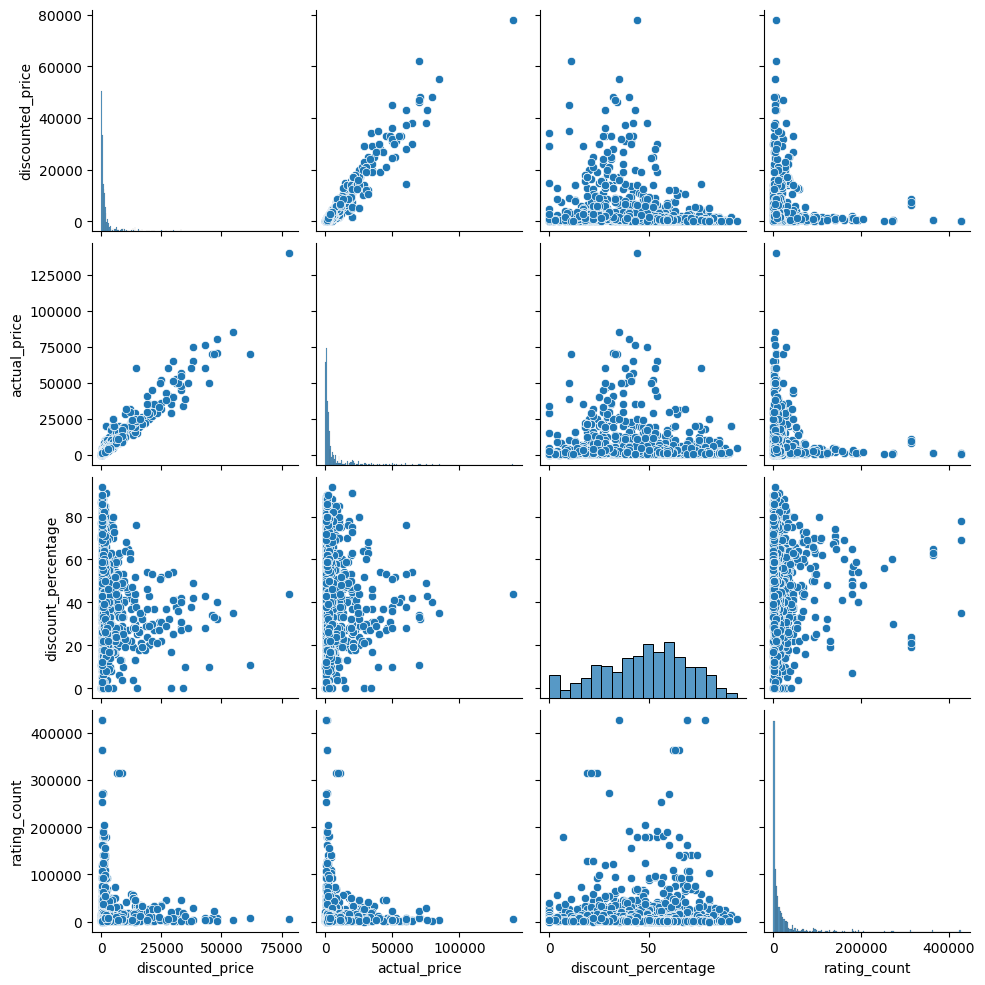

In [273]:
sns.pairplot(df4)

In [274]:
# These are the realtion between all the features